<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/DecisionTree_graphviz_impurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정트리 with Graphviz

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state= 156)

In [3]:
#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state=11)

In [5]:
#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [7]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

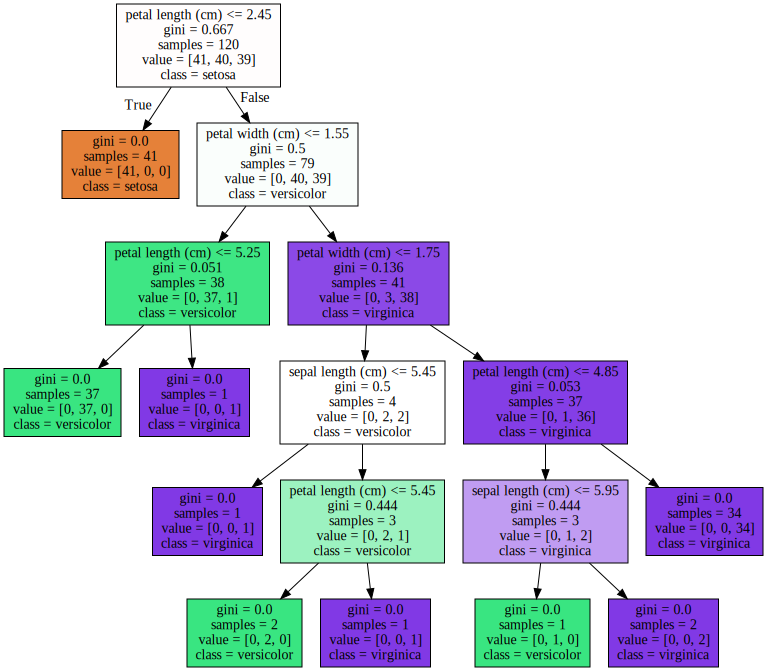

In [8]:
# Graphviz를 통해 시각화
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
# 생성된 dot파일을 png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

0

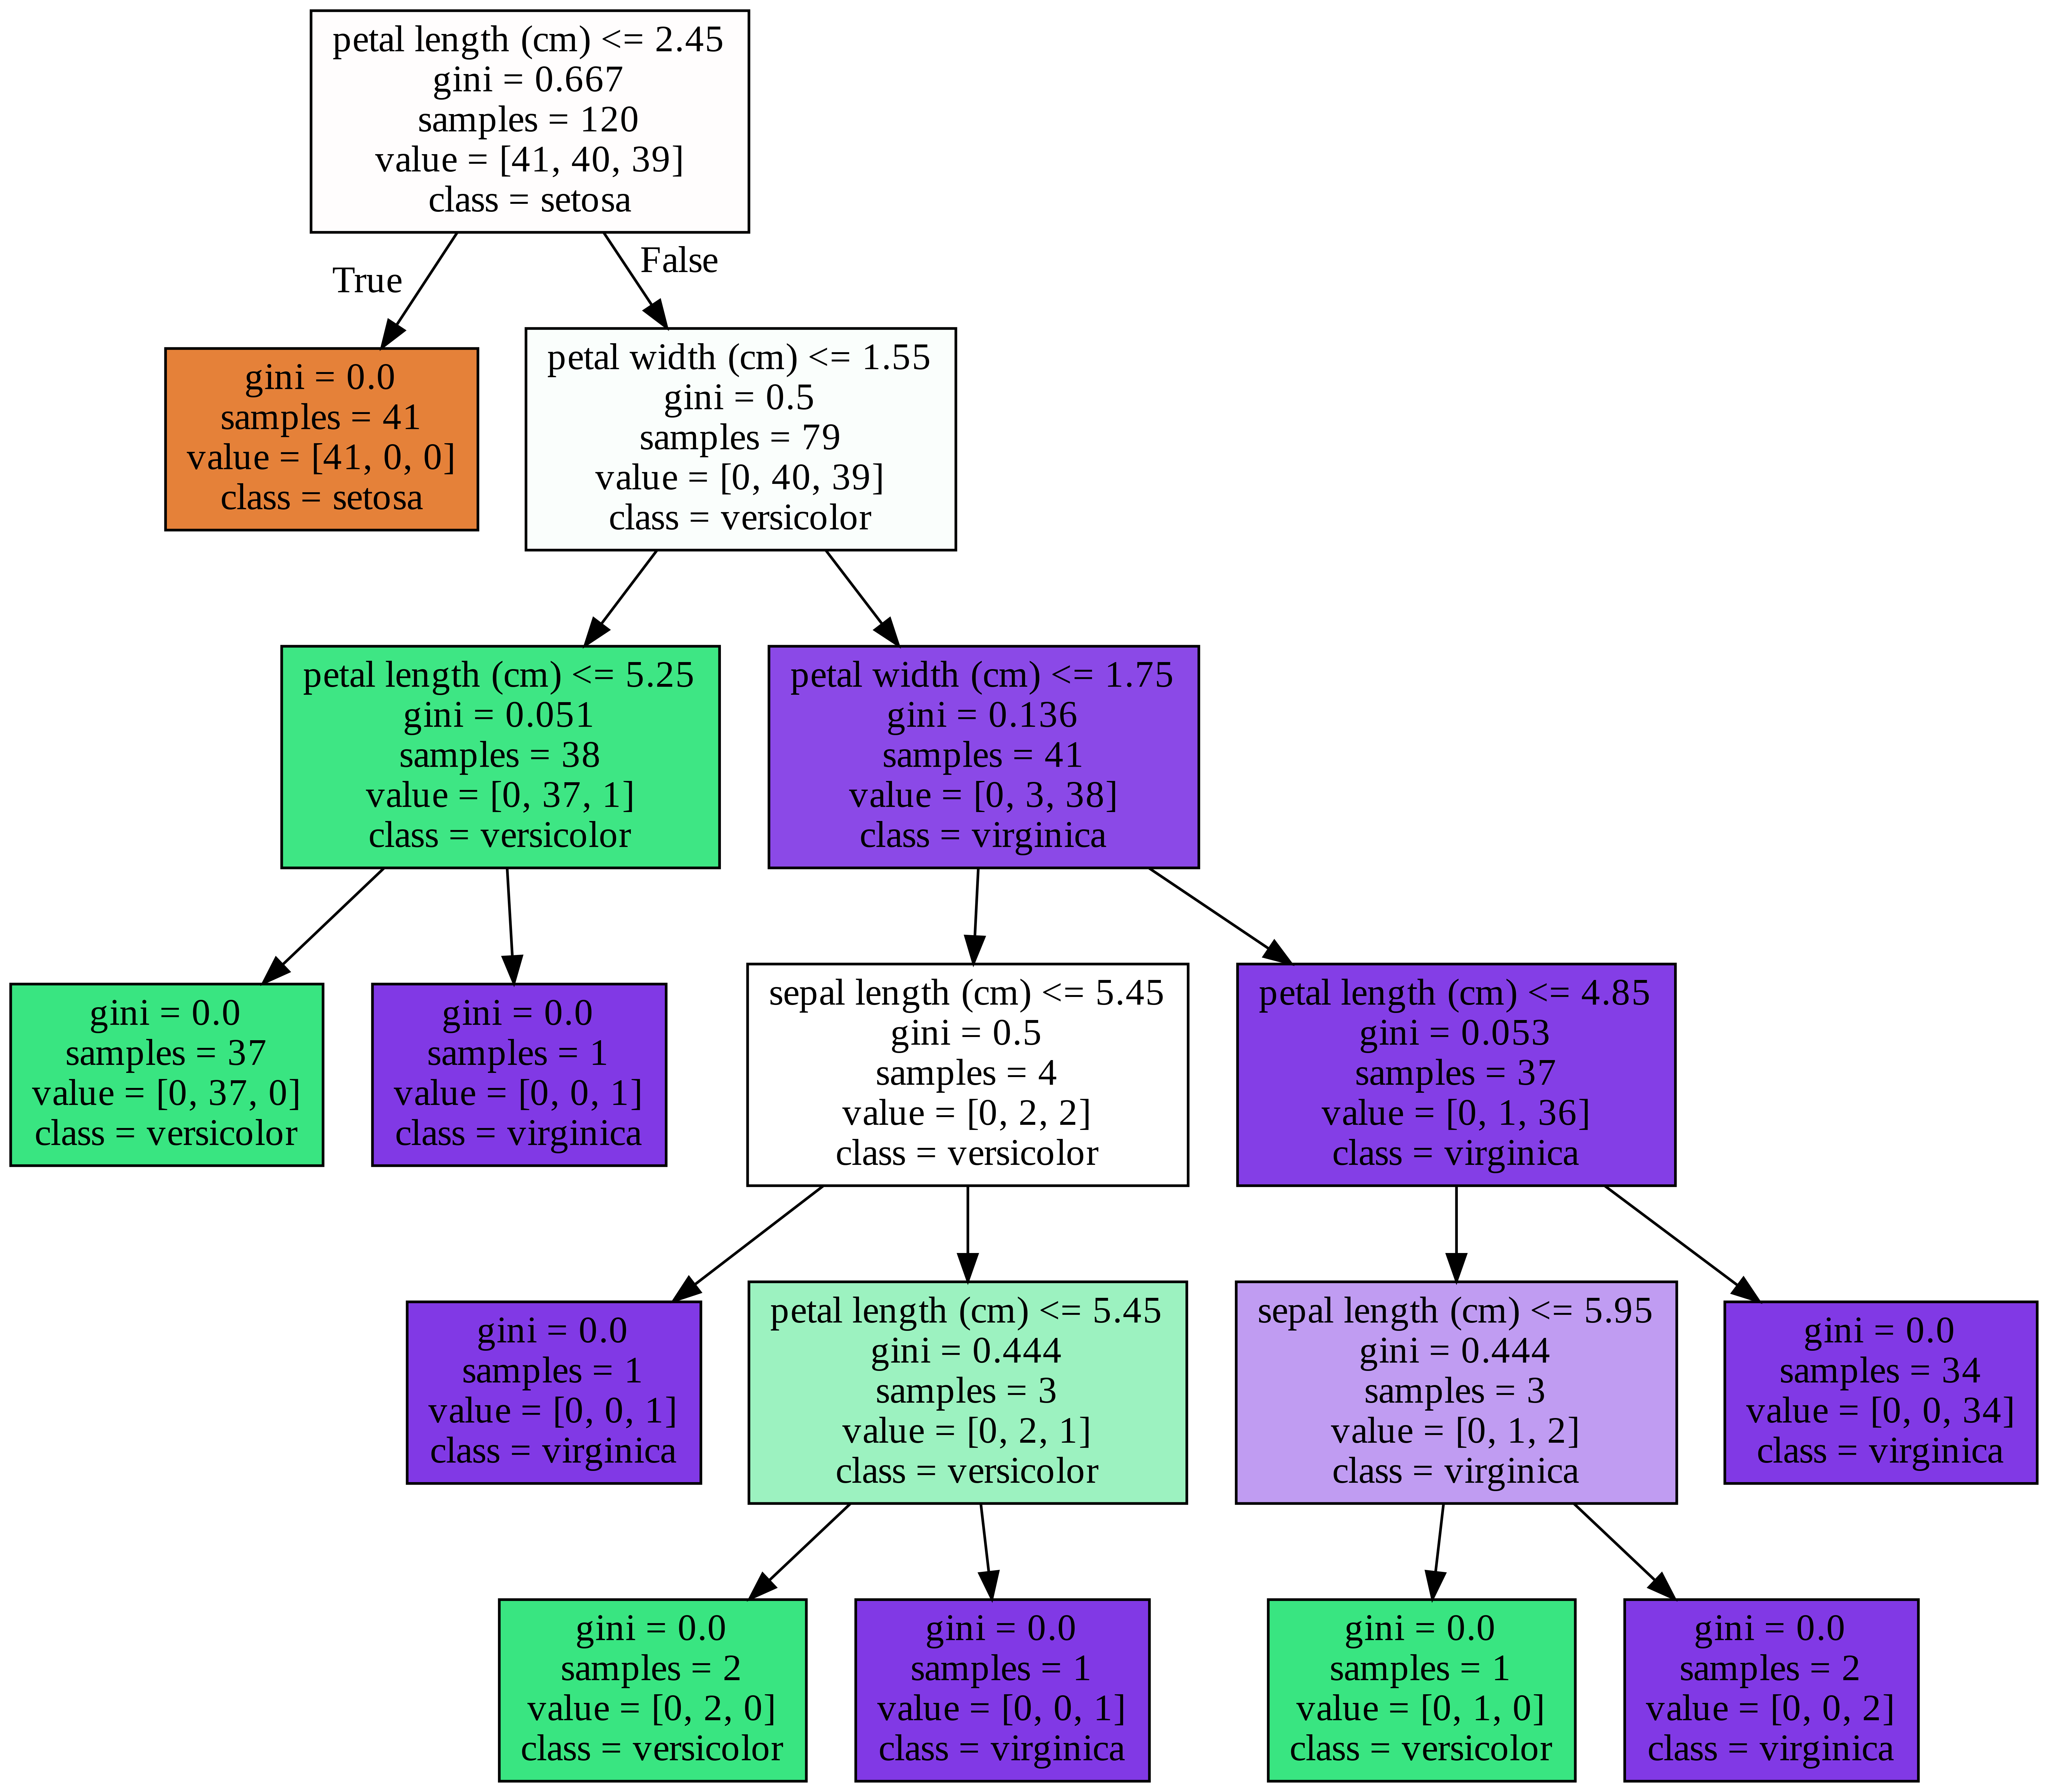

In [10]:
# png 출력
from IPython.display import Image
Image(filename = 'decision-tree.png')

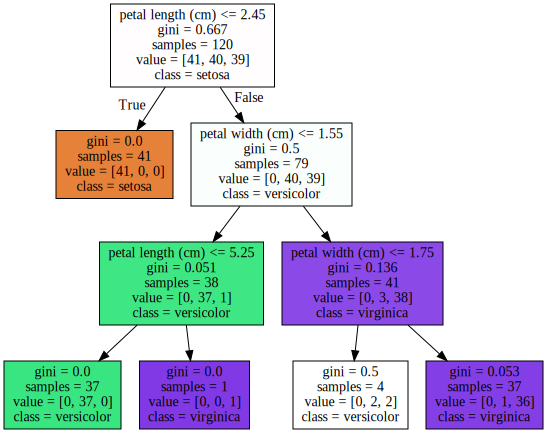

In [11]:
# 결정 트리 하이퍼 파라미터 튜닝
# max_depth 3으로 조정
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree_tuned.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open('tree_tuned.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

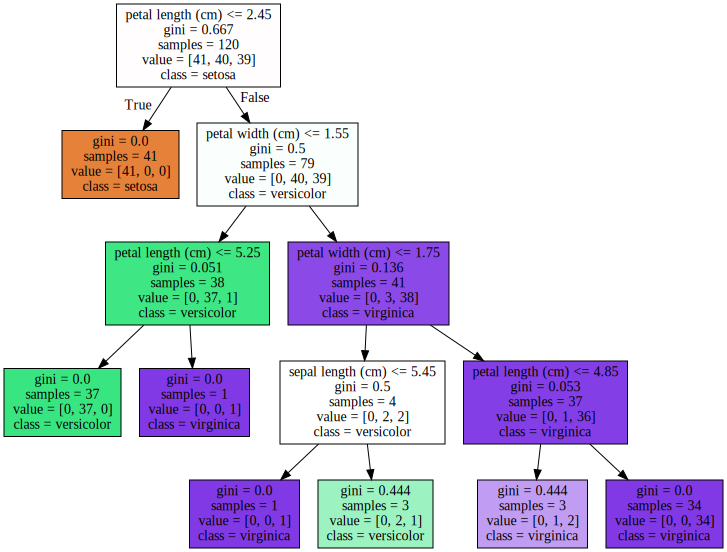

In [13]:
# 결정 트리 하이퍼 파라미터 튜닝
# max_depth 4로 튜닝
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=156)
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree_tuned.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open('tree_tuned.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

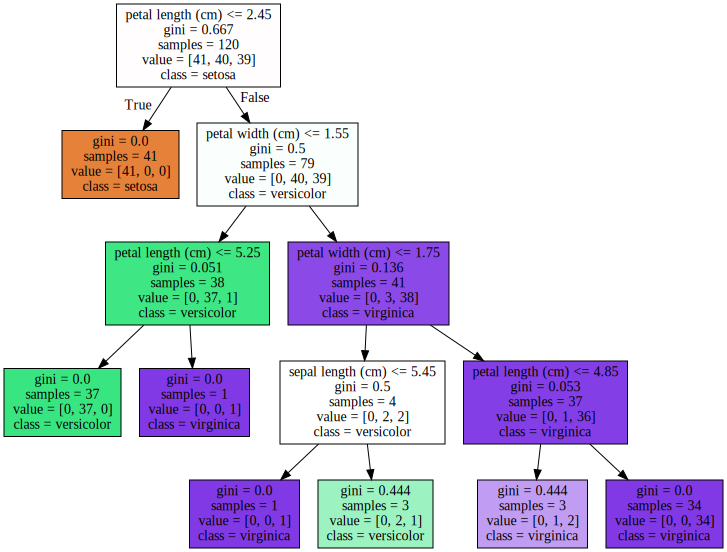

In [14]:
# 결정 트리 하이퍼 파라미터 튜닝
# min_samples_split 4로 튜닝
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree_tuned.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open('tree_tuned.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

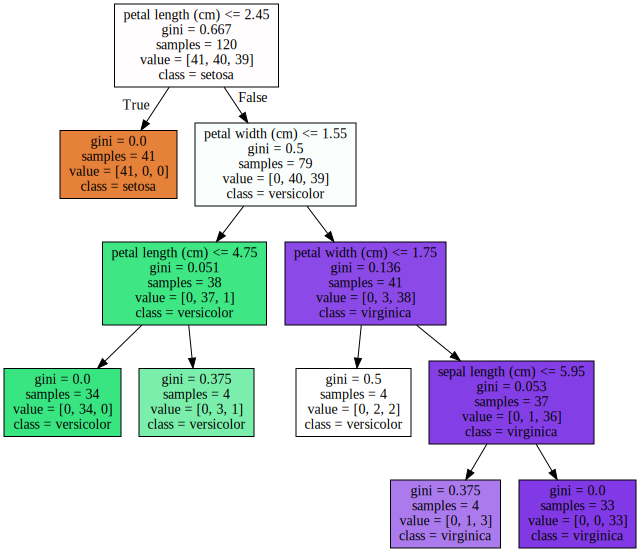

In [16]:
# 결정 트리 하이퍼 파라미터 튜닝
# min_samples_leaf 4로 튜닝
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree_tuned.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

with open('tree_tuned.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [18]:
# 피처 이름
print('iris_data.feature_names:', iris_data.feature_names)

iris_data.feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
# feature importance 추출
print('Feature importance: \n{}'.format(np.round(dt_clf.feature_importances_, 3)))

Feature importance: 
[0.006 0.    0.546 0.448]


In [20]:
# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))

sepal length (cm):0.006
sepal width (cm):0.000
petal length (cm):0.546
petal width (cm):0.448


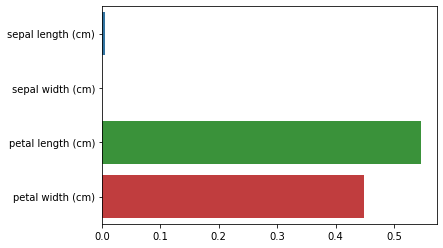

In [21]:
# feature importance를 column별로 시각화 하기

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

#### **과적합 시각화**

**make_classfication()함수**
  * 분류용 가상 데이터 생성
  

In [22]:
# 분류용 가상 데이터를 생성하고 시각화

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline


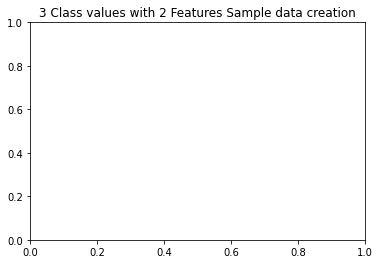

In [24]:
plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형으로 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0,
                                           n_informative=2, n_classes=3,
                                           n_clusters_per_class=1, random_state=0)

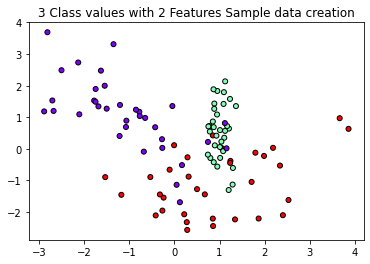

In [25]:
# plot 형태로 2개의 feature로 2차원 좌표 시각호, 각 클래스값은 다른 색깔로 표시됨

plt.title("3 Class values with 2 Features Sample data creation")
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [26]:

# Classifier의 Decision Boundary를 시각화 하는 함수
# 클래스 값을 예측하는 결정 기준을 색상과 경계로 표시
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


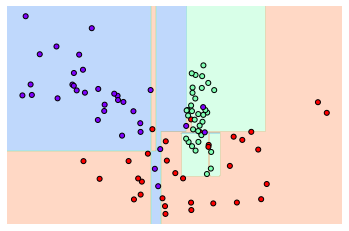

In [28]:
#특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

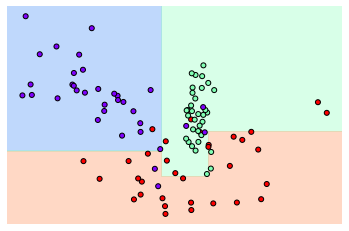

In [29]:
# min_samples_leaf=6 트리 생성 조건을 제약한 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6)
visualize_boundary(dt_clf, X_features, y_labels)

**features.txt 파일 로드 후 피처정보출력**

In [30]:
import pandas as pd

feature_name_df = pd.read_csv('./features.txt', sep='\s+',
                              header=None, names=['columns_index', 'column_name'])

In [31]:
feature_name_df

,columns_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [32]:
# index 제외하고 피처명만 추출해서 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [44]:
# 중복된 피처명 count
# 그룹별로 count : 1보다 크면 중복

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['columns_index']>1].count())
dup_cnt = feature_dup_df[feature_dup_df['columns_index']>1].count()

columns_index    42
dtype: int64


**중복된 피처명 변경**

In [45]:
f_dup_df = pd.DataFrame(feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])

In [46]:
f_dup_df_reset = f_dup_df.reset_index()

In [47]:
f_dup_df_reset

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
556,556,0
557,557,0
558,558,0
559,559,0


In [48]:
new_feature_name_df = pd.merge(feature_name_df.reset_index(), f_dup_df_reset, how='outer')

In [49]:
new_feature_name_df

,index,columns_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [50]:
#피처명 변경
new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0],  axis=1)
new_feature_name_df


,index,columns_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [2]:
import pandas as pd


In [5]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./drive/MyDrive/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./drive/MyDrive/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./drive/MyDrive/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./drive/MyDrive/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./drive/MyDrive/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()



**결정트리를 이용해서 동작 예측 분류 수행**

In [11]:
from sklearn.metrics import  accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [9]:
# 반복시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)

#학습
dt_clf.fit(X_train, y_train)

#예측
pred = dt_clf.predict(X_test)

#평가
accuracy = accuracy_score(y_test, pred)
print('예측 정확도 : ', accuracy)

예측 정확도 :  0.8547675602307431


In [12]:
params = {
    'max_depth' : [6 ,8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)

In [13]:
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최고 파라미터 :  {'max_depth': 16}


In [15]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [16]:
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [19]:
max_depths = [6 ,8, 10, 12, 16, 20, 24]

for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [31]:
dt_clf = DecisionTreeClassifier(random_state=156)
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)


In [32]:
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최고 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}
